In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.style.use("ggplot")

pd.set_option('display.max_columns', None)

In [8]:
df=pd.read_csv("../raw_data/trainset_full.csv", low_memory=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367190 entries, 0 to 1367189
Data columns (total 17 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index               1367190 non-null  int64  
 1   turbine_id          1367190 non-null  int64  
 2   measured_at         1367190 non-null  object 
 3   wind_speed          1367190 non-null  float64
 4   power               1367190 non-null  float64
 5   nacelle_direction   1367190 non-null  float64
 6   wind_direction      1367190 non-null  float64
 7   rotor_speed         1367190 non-null  float64
 8   generator_speed     1367190 non-null  float64
 9   temp_environment    1367190 non-null  int64  
 10  temp_hydraulic_oil  1367190 non-null  int64  
 11  temp_gear_bearing   1367190 non-null  int64  
 12  cosphi              1367190 non-null  float64
 13  blade_angle_avg     1367190 non-null  float64
 14  hydraulic_pressure  1367190 non-null  float64
 15  park_id        

In [10]:
df.describe()

,index,turbine_id,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id
count,1.367190e+06,1.367190e+06,1.367190e+06,1.367190e+06,1.367190e+06,1.367190e+06,1.367190e+06,1.367190e+06,1.367190e+06,1.367190e+06,1.367190e+06,1.367190e+06,1.367190e+06,1.367190e+06,1.367190e+06
mean,6.835945e+05,2.244315e+01,4.660850e-01,2.386451e-01,1.887500e+02,1.882401e+02,6.568465e-01,5.834968e-01,1.420441e+01,3.969864e+01,5.804010e+01,6.769930e-01,4.637889e+00,2.349338e+02,1.796216e+00
std,3.946739e+05,5.554621e+00,2.133459e-01,2.782844e-01,9.951697e+01,9.944392e+01,3.002719e-01,2.670637e-01,6.904299e+00,7.078892e+00,1.208863e+01,6.068740e-01,1.845868e+01,2.577628e+01,4.028107e-01
min,0.000000e+00,1.100000e+01,7.692308e-03,-1.770000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.100000e+01,5.000000e+00,6.000000e+00,-1.000000e+00,-5.000000e+00,-2.000000e+00,1.000000e+00
25%,3.417972e+05,2.100000e+01,3.083333e-01,2.675000e-02,9.180000e+01,9.130000e+01,5.250000e-01,4.669333e-01,9.000000e+00,3.900000e+01,5.000000e+01,7.700000e-01,-2.800000e+00,2.467000e+02,2.000000e+00
50%,6.835945e+05,2.400000e+01,4.384615e-01,1.310606e-01,2.120000e+02,2.116000e+02,6.750000e-01,5.961333e-01,1.400000e+01,4.200000e+01,6.000000e+01,1.000000e+00,-2.100000e+00,2.471000e+02,2.000000e+00
75%,1.025392e+06,2.700000e+01,5.846154e-01,3.505379e-01,2.603000e+02,2.598000e+02,8.916667e-01,7.904000e-01,1.900000e+01,4.400000e+01,6.700000e+01,1.000000e+00,8.000000e-01,2.472000e+02,2.000000e+00
max,1.367189e+06,2.900000e+01,1.950000e+00,1.001242e+00,3.599000e+02,3.599000e+02,1.116667e+00,9.981333e-01,4.100000e+01,8.900000e+01,8.600000e+01,1.000000e+00,9.030000e+01,2.617000e+02,2.000000e+00


In [18]:
df.isnull().sum()

index                 0
turbine_id            0
measured_at           0
wind_speed            0
power                 0
nacelle_direction     0
wind_direction        0
rotor_speed           0
generator_speed       0
temp_environment      0
temp_hydraulic_oil    0
temp_gear_bearing     0
cosphi                0
blade_angle_avg       0
hydraulic_pressure    0
park_id               0
error_category        0
Error                 0
dtype: int64

In [11]:
df.error_category.value_counts()

NO_ERROR    1272609
ERROR=12      47724
ERROR=17      21651
ERROR=3       10224
ERROR=5        4893
ERROR=19       3743
ERROR=24       1771
ERROR=28       1494
ERROR=8        1081
ERROR=20        787
ERROR=31        495
ERROR=30        409
ERROR=22        141
ERROR=25        108
ERROR=7          32
ERROR=27         22
ERROR=29          4
ERROR=23          2
Name: error_category, dtype: int64

In [12]:
df.groupby(by="park_id").turbine_id.value_counts()

park_id  turbine_id
1        13             69703
         14             69691
         11             69613
         12             69605
2        24            121509
         23            121508
         22            121495
         25            121493
         27            121454
         21            121308
         26            121146
         29            120979
         28            117686
Name: turbine_id, dtype: int64

Text(0.5, 1.0, 'Histogram of Windspeeds')

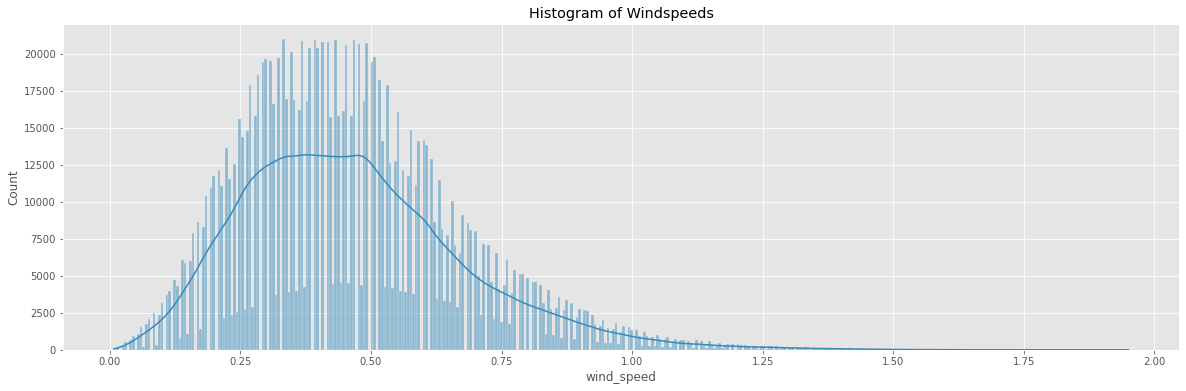

In [14]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.histplot(data=df, x="wind_speed", kde=True)
plt.title("Histogram of Windspeeds")



Text(0.5, 1.0, 'Power')

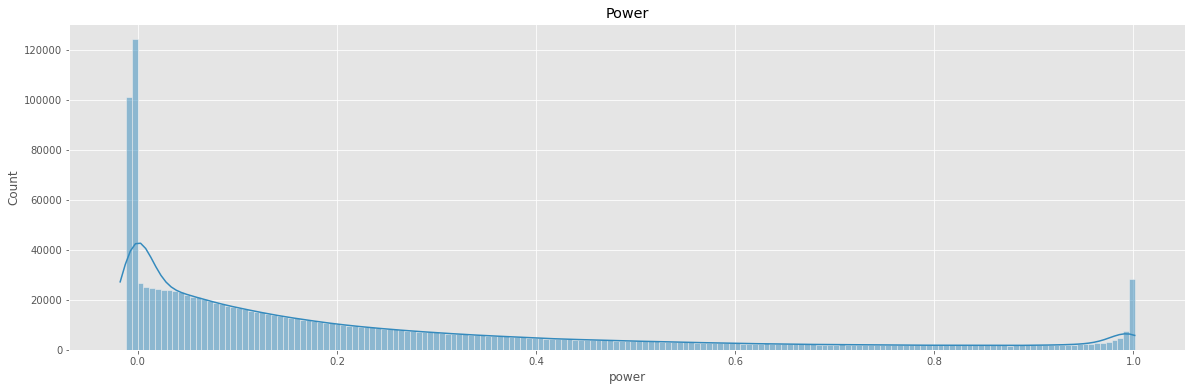

In [15]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.histplot(data=df, x="power", kde=True)
plt.title("Power")



In [16]:
df["Error"]=df.error_category != "NO_ERROR"

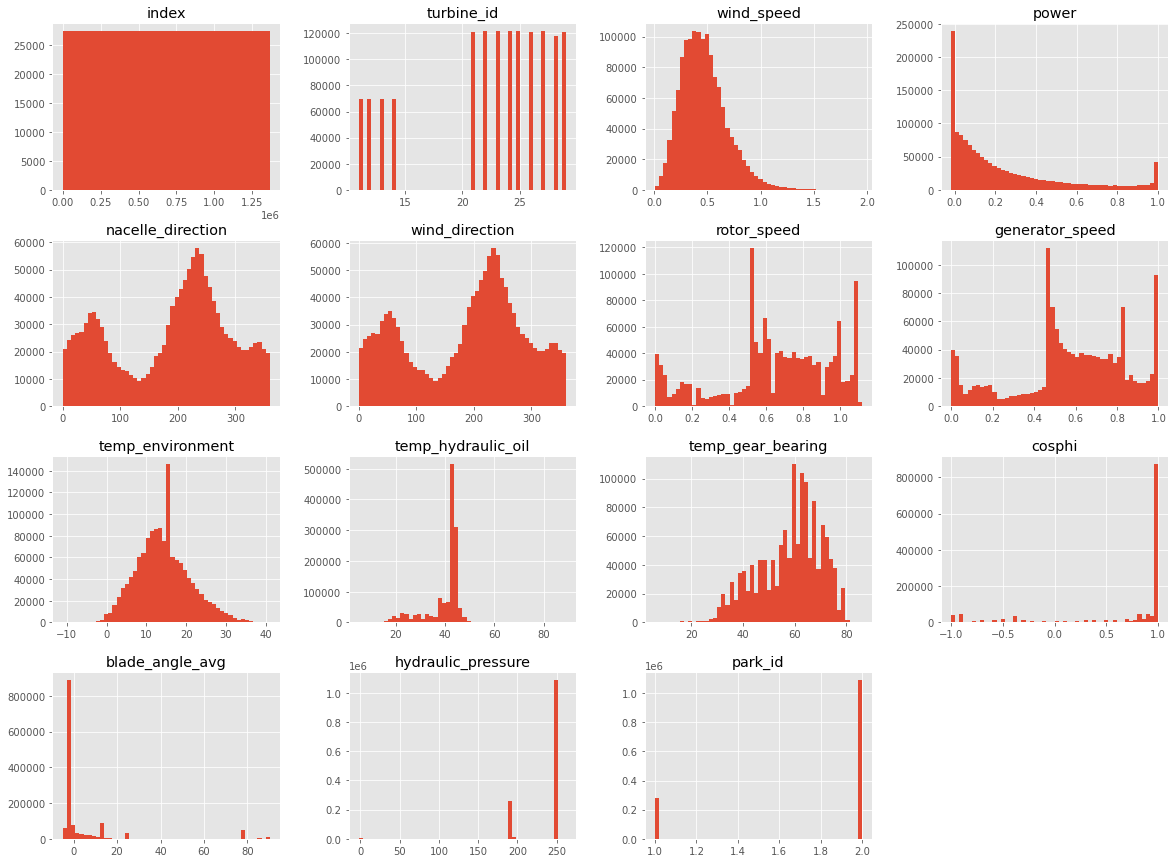

In [17]:
df.hist(bins=50,figsize=(20,15));

In [19]:
df.columns

Index(['index', 'turbine_id', 'measured_at', 'wind_speed', 'power',
       'nacelle_direction', 'wind_direction', 'rotor_speed', 'generator_speed',
       'temp_environment', 'temp_hydraulic_oil', 'temp_gear_bearing', 'cosphi',
       'blade_angle_avg', 'hydraulic_pressure', 'park_id', 'error_category',
       'Error'],
      dtype='object')

In [23]:
X_train=df[['index', 'turbine_id', 'measured_at', 'wind_speed', 'power',
       'nacelle_direction', 'wind_direction', 'rotor_speed', 'generator_speed',
       'temp_environment', 'temp_hydraulic_oil', 'temp_gear_bearing', 'cosphi',
       'blade_angle_avg', 'hydraulic_pressure', 'park_id']]
y_train=df.Error
y_train_full=df.error_category

In [27]:
#look for correlations
corrs=X_train.corrwith(y_train)
corrs.sort_values(ascending=False)

blade_angle_avg       0.864546
park_id               0.068881
temp_hydraulic_oil    0.057457
turbine_id            0.023719
wind_speed            0.016415
temp_environment      0.014123
index                -0.015161
hydraulic_pressure   -0.023082
wind_direction       -0.058649
nacelle_direction    -0.059448
temp_gear_bearing    -0.152136
power                -0.156739
rotor_speed          -0.427679
generator_speed      -0.427837
cosphi               -0.464427
dtype: float64

In [31]:
pd.crosstab(index=y_train,columns=X_train.turbine_id,normalize="columns",margins=True)

turbine_id,11,12,13,14,21,22,23,24,25,26,27,28,29,All
Error,,,,,,,,,,,,,,
False,0.970235,0.955564,0.968538,0.967141,0.89389,0.884473,0.868716,0.905916,0.924596,0.9834,0.949561,0.948167,0.94013,0.930821
True,0.029765,0.044436,0.031462,0.032859,0.10611,0.115527,0.131284,0.094084,0.075404,0.0166,0.050439,0.051833,0.05987,0.069179


In [30]:
pd.crosstab(index=y_train,columns=X_train.park_id,normalize="columns",margins=True)

park_id,1,2,All
Error,,,
False,0.965371,0.921978,0.930821
True,0.034629,0.078022,0.069179


<AxesSubplot:>

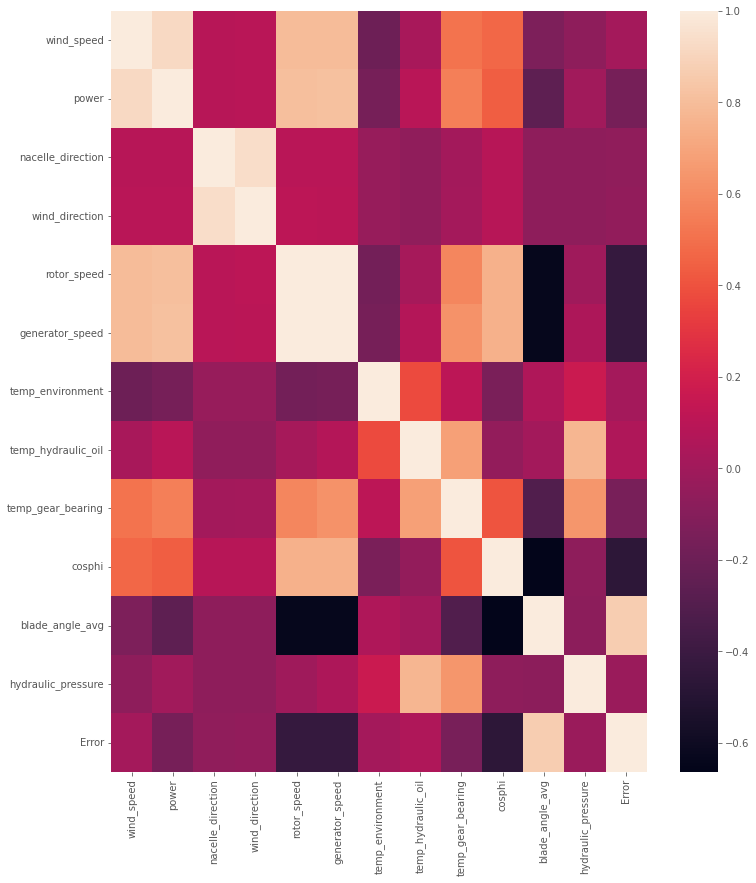

In [36]:
num_attribs=['measured_at', 'wind_speed', 'power',
       'nacelle_direction', 'wind_direction', 'rotor_speed', 'generator_speed',
       'temp_environment', 'temp_hydraulic_oil', 'temp_gear_bearing', 'cosphi',
       'blade_angle_avg', 'hydraulic_pressure']

fig, ax=plt.subplots(1,1,figsize=(5,14))
sns.heatmap(data=df[num_attribs+["Error"]].corr())